In [8]:
import pandas as pd
import numpy as np
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [9]:
# 한글 깨짐 방지
if platform.system() == 'Darwin': 
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) 

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

__경로 설정__

In [10]:
path = '파일 경로'

__데이터 로드__

In [11]:
tt_lstm_df = pd.read_csv(path+'트럼프 트위터 감성정수 파일명')
tb_lstm_df = pd.read_csv(path+'바이든 트위터 감성정수 파일명')

In [12]:
tt_lstm_list=tt_lstm_df['sentiment'].values.tolist()
tb_lstm_list=tb_lstm_df['sentiment'].values.tolist()

__학습 데이터 형태로 분할__

In [13]:
# input이 (n, 7, 1) 인 데이터를 만들것임 (바이든 / 트럼프 각각 진행 : 후보들에 대한 감성변화가 다르므로)
window_size = 7 #7일치(일주일)값을 넣어보기로 함
X_tt=[]
X_tb=[]
Y_tt=[]
Y_tb=[]

for i in range(len(tt_lstm_list)-window_size):
    X_tt.append([tt_lstm_list[i+j] for j in range(window_size)])
    X_tb.append([tb_lstm_list[i+j] for j in range(window_size)])
    Y_tt.append(tt_lstm_list[window_size+i])
    Y_tb.append(tb_lstm_list[window_size+i])
    
X_tt= np.array(X_tt)
Y_tt= np.array(Y_tt)
X_tb= np.array(X_tb)
Y_tb= np.array(Y_tb)

__학습,테스트 데이터 지정__

In [14]:
# 50개 정도를 트레이닝
# 4개 테스트
train_test_split = 50
# to trump
X_tt_train = X_tt[:train_test_split,:]
Y_tt_train = Y_tt[:train_test_split]
# to biden
X_tb_train = X_tb[:train_test_split,:]
Y_tb_train = Y_tb[:train_test_split]

# to trump
X_tt_test = X_tt[train_test_split:,:]
Y_tt_test = Y_tt[train_test_split:]
# to biden
X_tb_test = X_tb[train_test_split:,:]
Y_tb_test = Y_tb[train_test_split:]

X_tt_train=np.reshape(X_tt_train, (X_tt_train.shape[0], window_size, 1))
X_tb_train=np.reshape(X_tb_train, (X_tb_train.shape[0], window_size, 1))
X_tt_test=np.reshape(X_tt_test, (X_tt_test.shape[0], window_size, 1))
X_tb_test=np.reshape(X_tb_test, (X_tb_test.shape[0], window_size, 1))

__각 후보에 대한 두 모델 생성__

In [15]:
tt_model = Sequential()
tt_model.add(LSTM(128, input_shape=(7,1,)))     
tt_model.add(Dropout(0.2))
tt_model.add(Dense(1, activation='linear'))     #output은 1개
tt_model.compile(loss='mse', optimizer='adam')
tt_model.summary()                              # 과적합 요소 확인해보기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [16]:
tb_model = Sequential()
tb_model.add(LSTM(128, input_shape=(7,1,)))
tb_model.add(Dropout(0.2))
tb_model.add(Dense(1, activation='linear'))        #output은 1개
tb_model.compile(loss='mse', optimizer='adam')
tb_model.summary()                                 # 과적합 요소 확인해보기

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


__각 모델 학습__

In [17]:
tt_model.fit(X_tt_train, Y_tt_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1072
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0983
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0975
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0933
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0961
Epoch 6/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0905
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0906
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 10/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0952
Epoch 11/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0907
Epoch 12/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0891
Epoch 13/200
50/50 [=================

50/50 [==============================] - 0s 3ms/step - loss: 0.0309
Epoch 103/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 104/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 105/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 108/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0285
Epoch 109/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 112/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 113/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0219
Epoch 114/200
50/50 [=========

In [18]:
tb_model.fit(X_tb_train, Y_tb_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0590
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0560
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 5/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 8/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 9/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 10/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 11/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 12/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 13/200
50/50 [=================

50/50 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 103/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0279
Epoch 104/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0268
Epoch 105/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 106/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 107/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 108/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0247
Epoch 109/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 111/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 112/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 113/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 114/200
50/50 [=========

__시각화용 별도 데이터 저장__

In [20]:
tt_train_predict=tt_model.predict(X_tt_train)
tt_test_predict=tt_model.predict(X_tt_test)
tb_train_predict=tb_model.predict(X_tb_train)
tb_test_predict=tb_model.predict(X_tb_test)

__학습 결과 시각화__

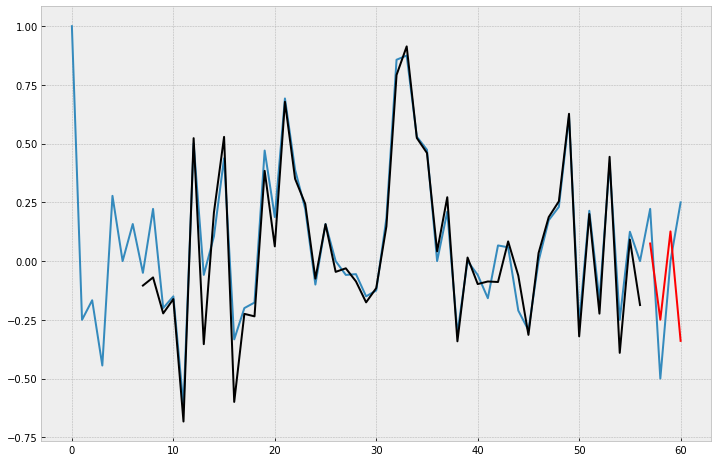

In [22]:
# 트럼프 예측 모델
plt.figure(figsize=(12,8))
plt.plot(tt_lstm_list)

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), tt_train_predict, color='black')
plt.plot(np.arange(split_pt,split_pt+len(tt_test_predict), 1), tt_test_predict, color='red')

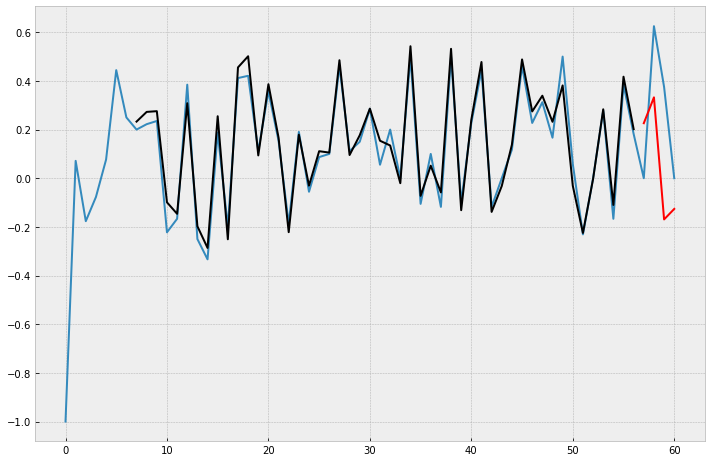

In [23]:
# 바이든 예측 모델
plt.figure(figsize=(12,8))
plt.plot(tb_lstm_list)

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), tb_train_predict, color='black')
plt.plot(np.arange(split_pt, split_pt+len(tb_test_predict), 1), tb_test_predict, color='red')

__모델 저장__

In [ ]:
tt_model.save("tt_model.h5")
tb_model.save("tb_model.h5")

__5일간의 미래 감성 점수 예측__

In [24]:
#트럼프
nFuture = 5
if len(tt_lstm_list) > 100:

    t_lastData = np.copy(tt_lstm_list[-100:])  # 원 데이터의 마지막 100개만 그려본다

else:

    t_lastData = np.copy(tt_lstm_list)    

t_dx = np.copy(t_lastData)

#바이든
if len(tb_lstm_list) > 100:

    b_lastData = np.copy(tb_lstm_list[-100:])  # 원 데이터의 마지막 100개만 그려본다

else:

    b_lastData = np.copy(tb_lstm_list)    

b_dx = np.copy(b_lastData)

In [25]:
# 향후 20 기간 데이터를 예측한다. 향후 1 기간을 예측하고, 예측값을 다시 입력하여 2 기간을 예측한다.
# 이런 방식으로 20 기간까지 예측한다.

# trump
nStep=7

t_estimate = [t_dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    t_px = t_dx[-nStep:].reshape(1, nStep, 1)   
    # 다음 값을 예측한다.
    t_yHat = tt_model.predict(t_px)[0][0]
      
    # 예측값을 저장해 둔다
    t_estimate.append(t_yHat)    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    t_dx = np.insert(t_dx, len(t_dx), t_yHat)

# biden
b_estimate = [b_dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    b_px = b_dx[-nStep:].reshape(1, nStep, 1)   
    # 다음 값을 예측한다.
    b_yHat = tb_model.predict(b_px)[0][0]
      
    # 예측값을 저장해 둔다
    b_estimate.append(b_yHat)    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    b_dx = np.insert(b_dx, len(b_dx), b_yHat)

__예측 결과 시각화__

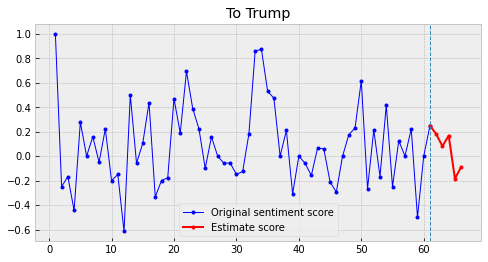

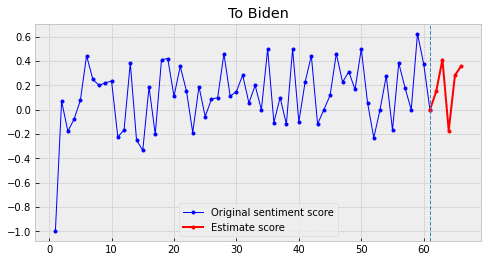

In [26]:
# 원 시계열과 예측된 시계열을 그린다

#Trump
t_ax1 = np.arange(1, len(t_lastData) + 1)

t_ax2 = np.arange(len(t_lastData), len(t_lastData) + len(t_estimate))

plt.figure(figsize=(8, 4))

plt.title("To Trump")

plt.plot(t_ax1, t_lastData, 'b-o', color='blue', markersize=3, label='Original sentiment score', linewidth=1)

plt.plot(t_ax2, t_estimate, 'b-o', color='red', markersize=3, label='Estimate score')

plt.axvline(x=t_ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()

# Biden
b_ax1 = np.arange(1, len(b_lastData) + 1)

b_ax2 = np.arange(len(b_lastData), len(b_lastData) + len(b_estimate))

plt.figure(figsize=(8, 4))

plt.title("To Biden")

plt.plot(b_ax1, b_lastData, 'b-o', color='blue', markersize=3, label='Original sentiment score', linewidth=1)

plt.plot(b_ax2, b_estimate, 'b-o', color='red', markersize=3, label='Estimate score')

plt.axvline(x=b_ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()

__예측 구간 확대 시각화__

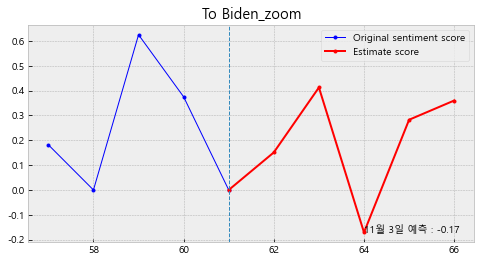

In [30]:
bb_ax1 = np.arange(57,62)

bb_ax2 = np.arange(len(b_lastData), len(b_lastData) + len(b_estimate))

plt.figure(figsize=(8, 4))

plt.title("To Biden_zoom")

plt.plot(bb_ax1, b_lastData[-5:], 'b-o', color='blue', markersize=3, label='Original sentiment score', linewidth=1)

plt.plot(bb_ax2, b_estimate, 'b-o', color='red', markersize=3, label='Estimate score')

plt.text(64,b_estimate[3],f'11월 3일 예측 : {b_estimate[3]:.2f}')

plt.axvline(x=bb_ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()

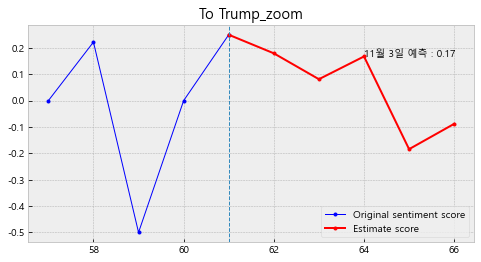

In [31]:
tt_ax1 = np.arange(57,62)

tt_ax2 = np.arange(len(t_lastData), len(t_lastData) + len(t_estimate))

plt.figure(figsize=(8, 4))

plt.title("To Trump_zoom")

plt.plot(tt_ax1, t_lastData[-5:], 'b-o', color='blue', markersize=3, label='Original sentiment score', linewidth=1)

plt.plot(tt_ax2, t_estimate, 'b-o', color='red', markersize=3, label='Estimate score')

plt.text(64,t_estimate[3],f'11월 3일 예측 : {t_estimate[3]:.2f}')

plt.axvline(x=tt_ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()

---